# 2nd order servo model

![diagram](../doc/diagrams/control-servo.png)


In [127]:
import numpy
import matplotlib.pyplot as plt
import LibsControl

#2nd order state space model
#dx = Ax + Bu

#dv   = -1.0/tau*v + amp/tau*u
#dpos = v

tau = 0.25
amp = 3.7


#fill matrices
a = numpy.zeros((2, 2))
b = numpy.zeros((2, 1))

a[0][0] = -1.0/tau
a[0][1] = 0.0
a[1][0] = 1.0
a[1][1] = 0.0

b[0][0] = amp/tau

print(a)
print(b)

[[-4.  0.]
 [ 1.  0.]]
[[14.8]
 [ 0. ]]


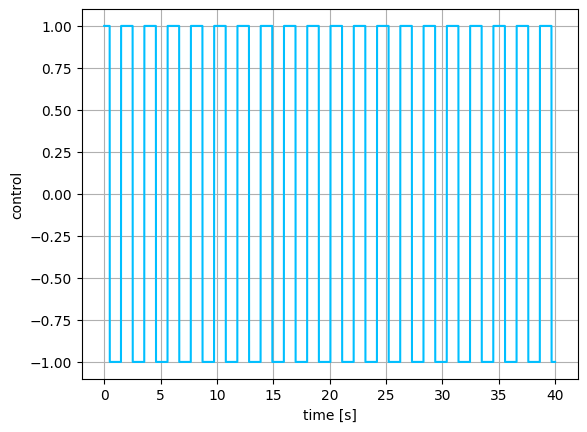

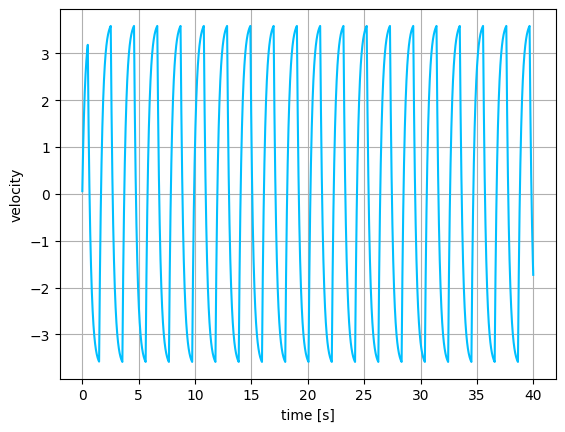

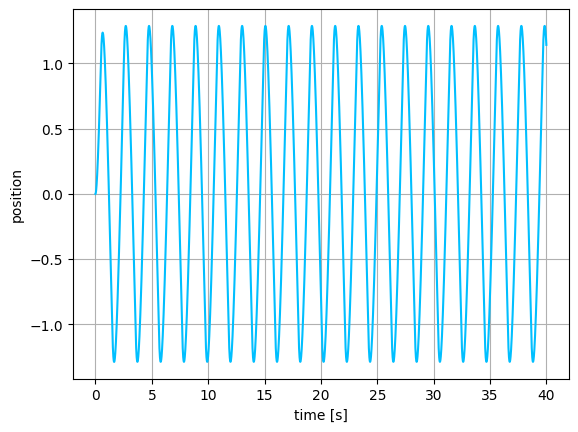

In [128]:
dt          = 1.0/250.0
steps       = 10000
t_result    = numpy.arange(steps)*dt

#initial state
x           = numpy.zeros((2, 1))

#resulted states for ploting
u_result    = numpy.zeros((steps, 1))
x_result    = numpy.zeros((steps, 2))

u_out_max   = 1.0
u_out       = u_out_max
pos_max     = 1.0

for i in range(steps):
    
    if x[1, 0] > pos_max:
        u_out   = -u_out_max
    elif x[1, 0] < -pos_max:
        u_out   = u_out_max
    
    u = numpy.ones((1, 1))*u_out

    dx = a@x + b@u
    x  = x   + dx*dt

    u_result[i] = u[:, 0]
    x_result[i] = x[:, 0]

#plot response
plt.clf()
plt.ylabel("control")
plt.xlabel("time [s]")
plt.plot(t_result, u_result[:, 0], color="deepskyblue")
plt.grid()
plt.show()

plt.clf()
plt.ylabel("velocity")
plt.xlabel("time [s]")
plt.plot(t_result, x_result[:, 0], color="deepskyblue")
plt.grid()
plt.show()


plt.clf()
plt.ylabel("position")
plt.xlabel("time [s]")
plt.plot(t_result, x_result[:, 1], color="deepskyblue")
plt.grid()
plt.show()


>>> fft_denoising  (10000, 2)


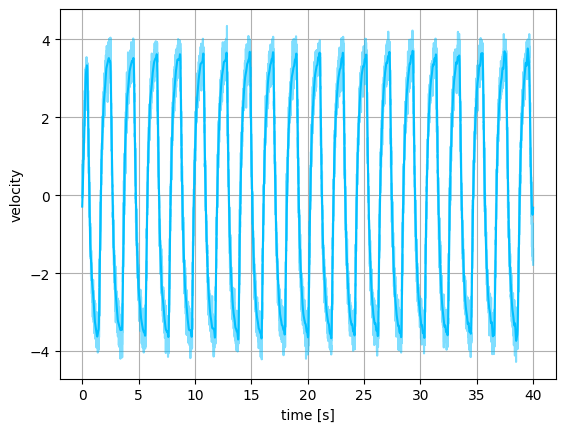

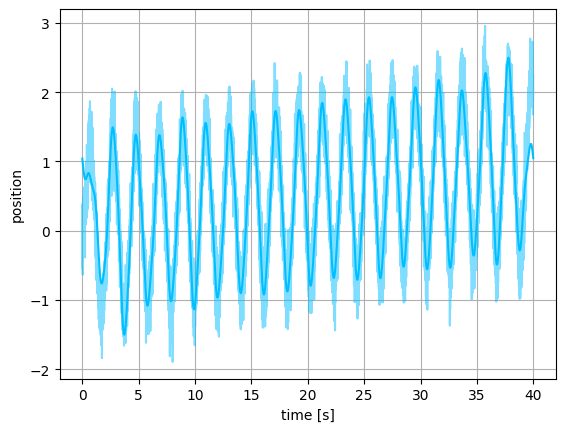

a    =  [[-3.6227455   0.        ]
 [ 0.99437606  0.        ]]
b    =  [[13.202426]
 [ 0.      ]]


tau  =  0.276033741856476
k    =  3.6443150384181635


In [129]:

x_noised = x_result  + 0.25*numpy.random.randn(x_result.shape[0], x_result.shape[1])
x_noised[:, 1]+= 1.0*numpy.arange(x_noised.shape[0])/x_noised.shape[0]

x_denoised = LibsControl.fft_denoising(x_noised, [100.0, 300.0])



plt.clf()
plt.ylabel("velocity")
plt.xlabel("time [s]")
plt.plot(t_result, x_noised[:, 0], color="deepskyblue", alpha=0.5)
plt.plot(t_result, x_denoised[:, 0], color="deepskyblue", alpha=1.0)
plt.grid()
plt.show()


plt.clf()
plt.ylabel("position")
plt.xlabel("time [s]")
plt.plot(t_result, x_noised[:, 1], color="deepskyblue", alpha=0.5)
plt.plot(t_result, x_denoised[:, 1], color="deepskyblue", alpha=1.0)
plt.grid()
plt.show()



models, loss     = LibsControl.identification(u_result, x_denoised, dt)

model   = models[2]
ab      = model.T

order   = x_result.shape[1]
a = ab[:, 0:order]
b = ab[:, order:]


tau = -1.0/a[0][0]
k   = b[0][0]*tau


print("a    = ", a)
print("b    = ", b)
print("\n")
print("tau  = ", tau)
print("k    = ", k)

